## Importing Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Correlations and Relations:

Here, we will be working with the training data. we will see the correlation between the SalePrice and the other features.

This will help us determine which features and the most important so we can clean them and explore them better.

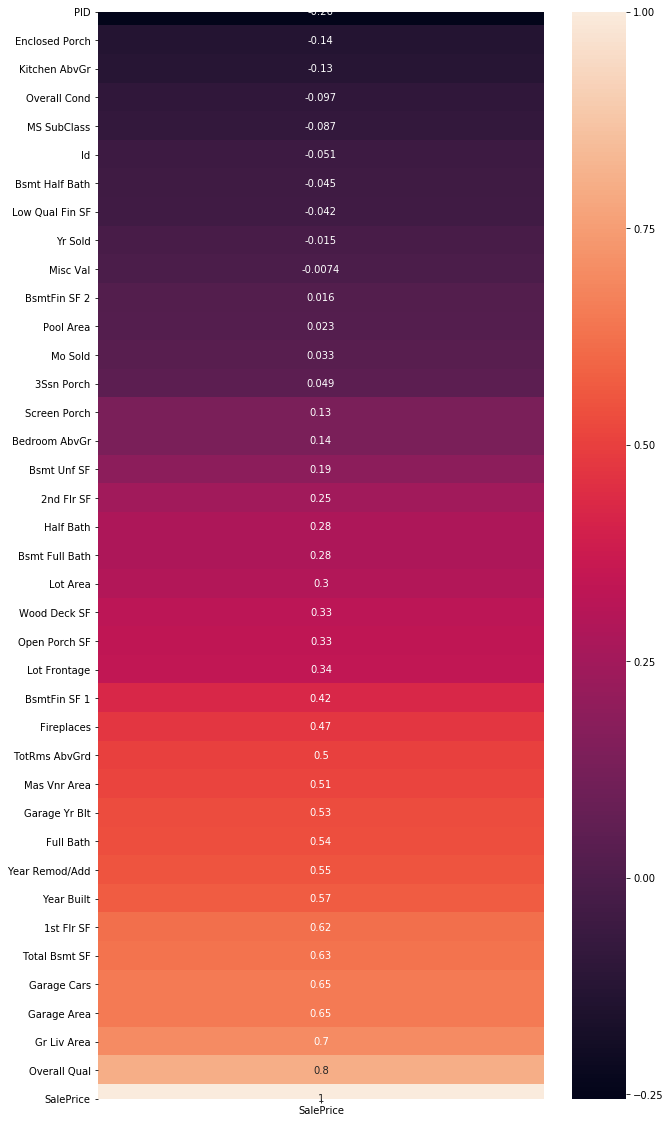

In [4]:
#heatmap for Sale Price and numerical columns 
plt.figure(figsize = (10,20))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending = True), annot = True)


We can see that 'Overall Qual', 'Gr Liv Area', 'Garage Area','Garage Cars', 'Total Bsmt SF' and '1st Flr SF' are highly correlated with the Sale Price.

In [5]:
#assigning these highly correlated columns to a new var
corr_col = ['Overall Qual', 'Gr Liv Area', 'Garage Area','Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']

In [6]:
train[corr_col].head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,SalePrice
0,6,1479,475.0,2.0,725.0,725,130500
1,7,2122,559.0,2.0,913.0,913,220000
2,5,1057,246.0,1.0,1057.0,1057,109000
3,5,1444,400.0,2.0,384.0,744,174000
4,6,1445,484.0,2.0,676.0,831,138500


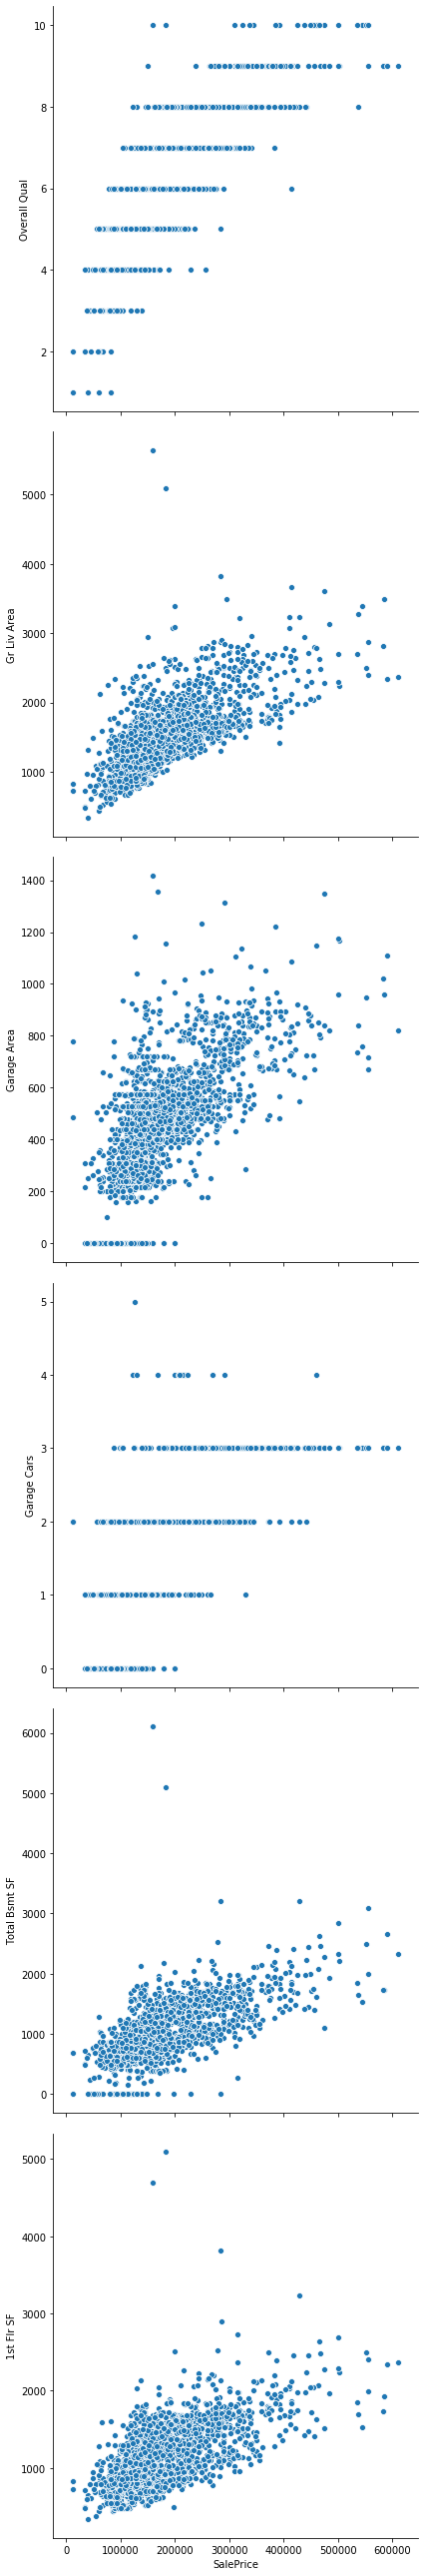

In [7]:
# lets see how these data get scatterplotted with the Sale Price
sns.pairplot(train, x_vars=corr_col[-1], y_vars=corr_col[:-1], height = 6)

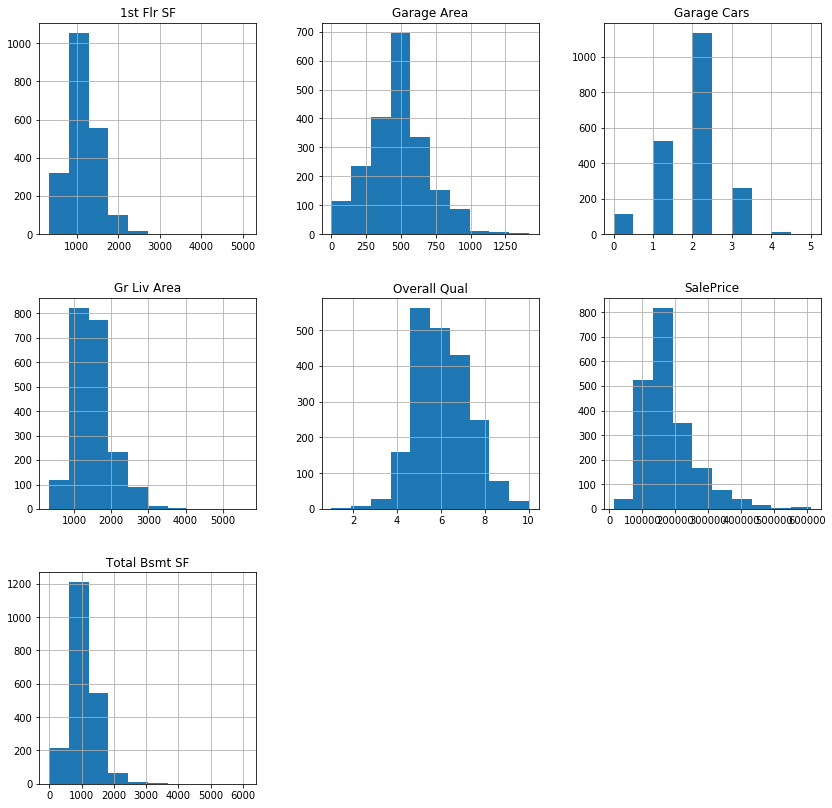

In [8]:
train[corr_col].hist(figsize=(14,14));

### Analyzing the Pairplot and Histograms:

#### 1. Overall Quality

Because this is an ordinal-categorical column, we can better look at it using a bar chart 

Text(0, 0.5, 'Average Sale Price')

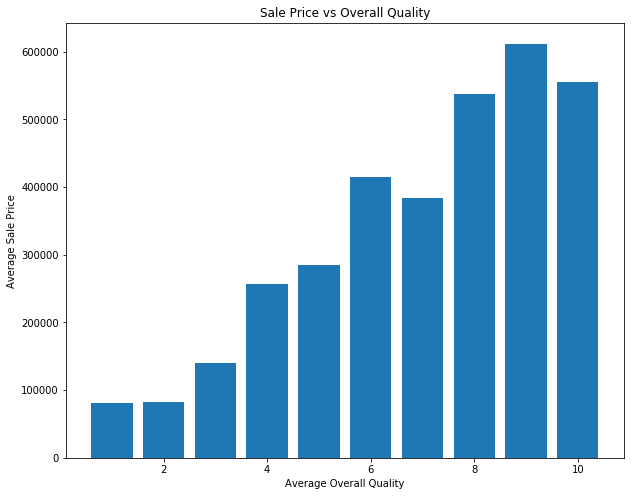

In [11]:
# creating a bar chart
plt.figure(figsize=(10,8))
plt.bar(train['Overall Qual'], train['SalePrice'])
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Average Overall Quality')
plt.ylabel('Average Sale Price')


Or by a box plot to better understand the mean and outliers 

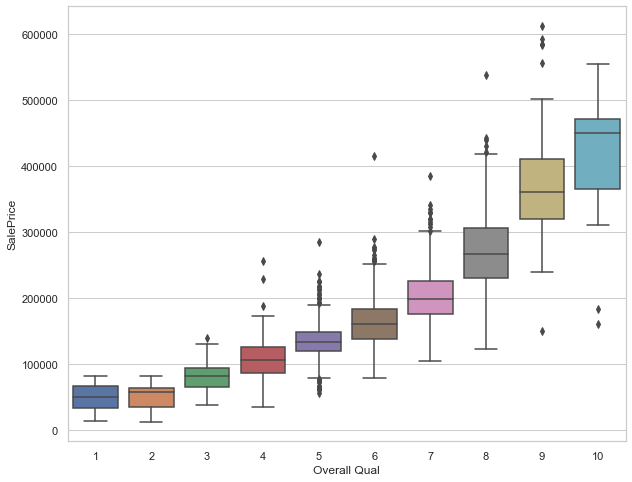

In [70]:
# Box plot overallqual/saleprice
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(train['Overall Qual'], train['SalePrice'])

- From the bar chart we can see that high overall quality homes are more expensive than lower ones, and that make sense.
- From the Histogram, the data is kind of normally distributed with a little of left skewness. which means that most of these house are rated as 5 or more.
- Overall Quality of the house has the most correlation with the price of the house.

#### 2. Ground living area

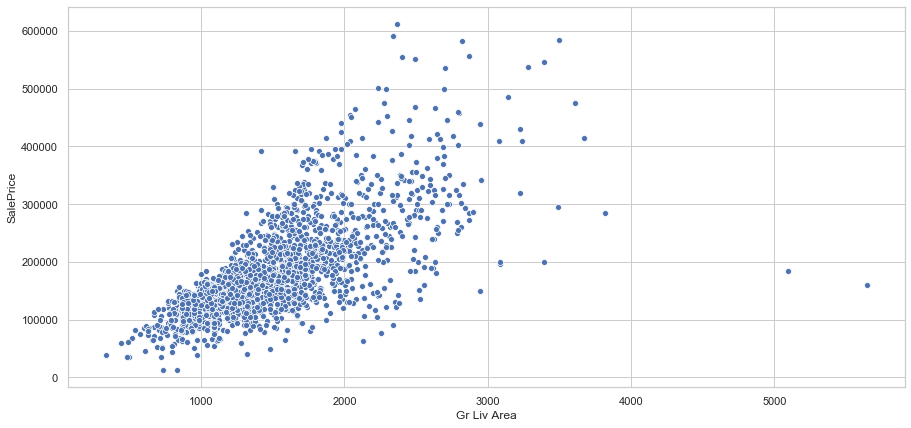

In [71]:
#scatterplot for ground living area vs saleprice
plt.figure(figsize=(15,7))
sns.scatterplot(train['Gr Liv Area'],train['SalePrice'])

- We can see here that there is a linear relation between the sale price and the size of the ground living area. Bigger living area means a bigger house, which mean a higher price.
- The distribution for the ground living area is very right skewed. some houses have a very large ground level areas with the majority being between 1000-2000 sq/ft

#### 3. Total Basement and First Floor Areas

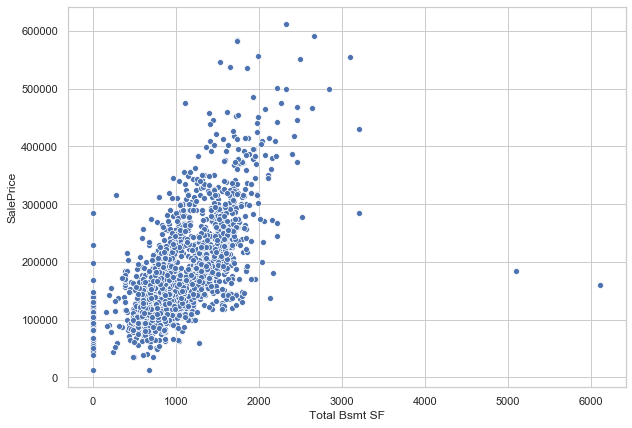

In [72]:
#scatterplot for ground living area vs saleprice
plt.figure(figsize=(10,7))
sns.scatterplot(train['Total Bsmt SF'],train['SalePrice'])

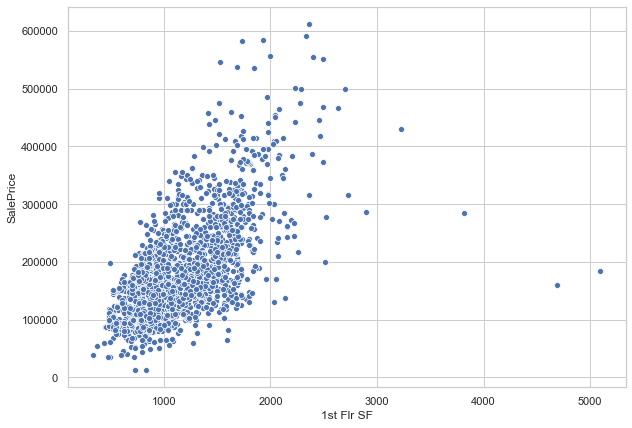

In [73]:
#scatterplot for ground living area vs saleprice
plt.figure(figsize=(10,7))
sns.scatterplot(train['1st Flr SF'],train['SalePrice'])

- For the Total first floor and garage areas we see that the there is also a linear relationships between them and the price.
- The linearity here has a steeper slope than the ground living area. which means that the price of the house increases greater when the 1st floor and basement areas increase than when the ground living area increases. 



There are some houses with no basement (0 in Total Bsmt SF). These houses tend to have a low price compared to the other with a basement:

Here we see the average price for houses without a basement

In [74]:
train[train['Total Bsmt SF'] == 0]['SalePrice'].mean()

106847.66666666667

And here the average house price with a basement.

In [75]:
train[train['Total Bsmt SF'] != 0]['SalePrice'].mean()

183487.5232849274

#### 4. Garage Area and Garage Areas:

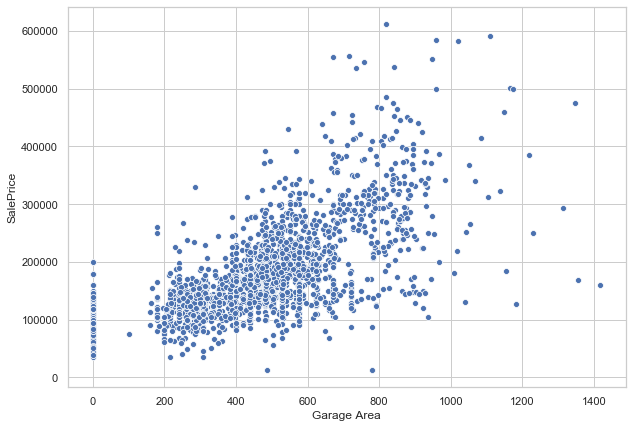

In [76]:
#scatterplot for ground living area vs saleprice
plt.figure(figsize=(10,7))
sns.scatterplot(train['Garage Area'],train['SalePrice'])

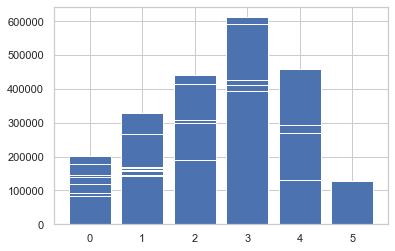

In [77]:
# creats a bar chart
plt.bar(train['Garage Cars'], train['SalePrice'])
plt.xlabel = 'Overall Quality'
plt.ylabel = 'Sale Price'

- Same for basements, houses with no garages (either zero on the scatterplot for the area or a zero on the bar for number of cars in the garage), these houses have a lower average price that the one that have ones.
- These is also a linear relationship between the house price and the garage area.